### Load data from Michibiki-1 Magnetometers and create data gap

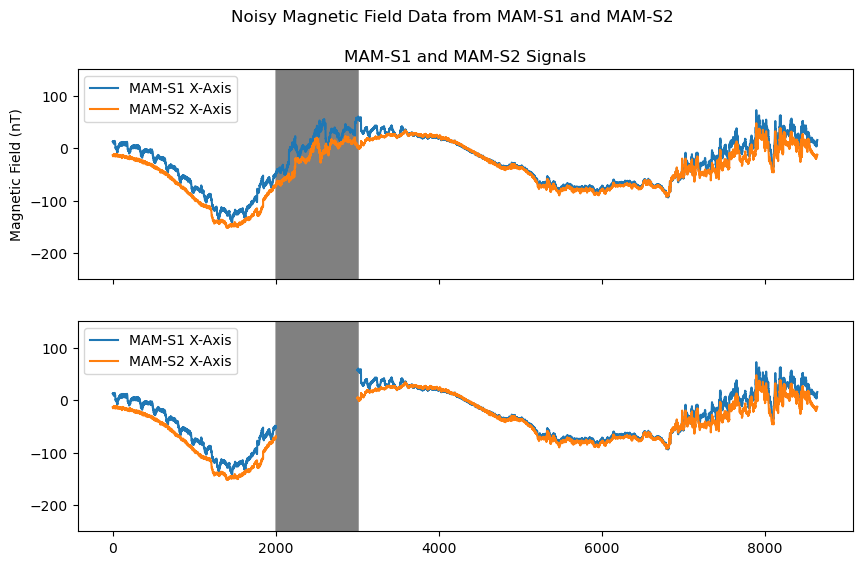

In [15]:
"Import the necessary modules"
from magprime import utility
import numpy as np
import matplotlib.pyplot as plt


B = utility.load_michibiki_data() # shape = (n_sensor, n_axis, n_samples)

"Decimate the data to 0.1 Hz because UBSS and MSSA are slow methods and it will take a long time to run on 86,400 data points"
B_qzs = B[:,:,::10]
B_gap = np.copy(B_qzs); B_gap[:,:,2000:3000] = np.nan
gaps = 1 - np.isnan(B_gap)


"Create a 3 x 2-panel plot of MAM-S1 and MAM-S2 data with overlapping magnetometers in the same panel"
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=True)
fig.suptitle("Noisy Magnetic Field Data from MAM-S1 and MAM-S2")
axs[0].set_title("MAM-S1 and MAM-S2 Signals")
axs[0].plot(B_qzs[0,0], label="MAM-S1 X-Axis")
axs[0].plot(B_qzs[1,0], label="MAM-S2 X-Axis")
axs[0].set_ylabel("Magnetic Field (nT)")
axs[0].set_ylim(-250, 150)
axs[0].legend()


axs[1].plot(B_gap[:,0,:].T, label=["MAM-S1 X-Axis", "MAM-S2 X-Axis"])
axs[1].legend()

# Adding grey areas for gaps
for i, g in enumerate(gaps[0, 0]):
    if g == 0:
        axs[0].axvspan(i, i+1, color='grey', alpha=0.5)
        axs[1].axvspan(i, i+1, color='grey', alpha=0.5)

plt.show()



### Interpolate missing segment

In [16]:
from magprime.utility import interpolation

print